# RNN (Time Series)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [15]:
df000 = pd.read_csv('RSCCASN.csv')
df00 = pd.read_csv('RSCCASN.csv',
                    index_col='DATE')
df0 = pd.read_csv('RSCCASN.csv',
                   index_col='DATE',
                   parse_dates=True)
df = df0.copy()

In [17]:
df000.head(2)

,DATE,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524


In [18]:
df00.head(2)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524


In [22]:
df0.head(2)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524


In [21]:
df000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     334 non-null    object
 1   RSCCASN  334 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [23]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2+ KB


In [24]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [25]:
df.columns = ['Sales']

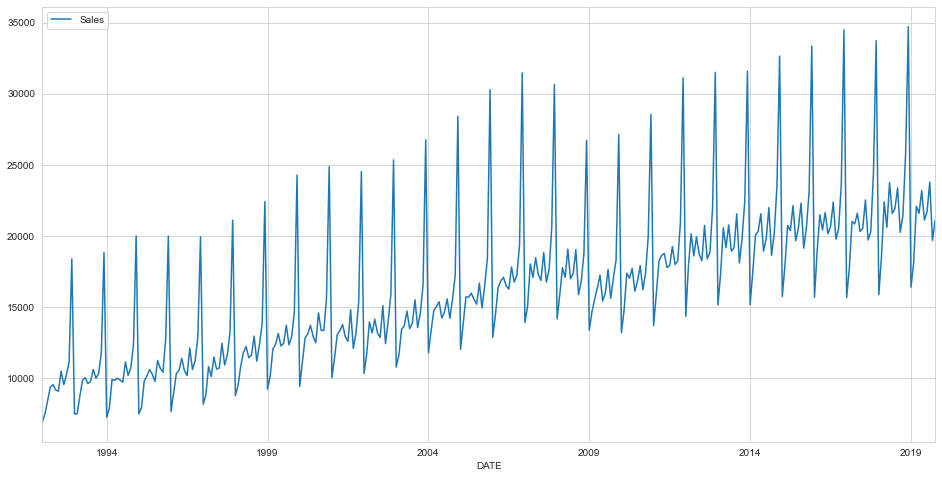

In [28]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [31]:
len(df)

334

In [32]:
len(df)- 18

316

In [33]:
test_size = 18

In [35]:
test_ind = len(df)- test_size
test_ind 

316

In [36]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [37]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [38]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


### Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [42]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
# help(TimeseriesGenerator)

In [43]:
length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [44]:
test_scaled

array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ],
       [0.52770113],
       [0.68592071],
       [1.00813244],
       [0.34388615],
       [0.40647691],
       [0.55021057],
       [0.53220302],
       [0.59040081],
       [0.51499419],
       [0.53645077],
       [0.61185739],
       [0.46314987],
       [0.51463114]])

In [45]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [48]:
X, y = generator[0]

In [49]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


## Modelling

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [51]:
n_features = 1

In [52]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and Validation Generator

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [56]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [57]:
len(validation_generator)

6

In [58]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
304/304 [==============================] - 9s 17ms/step - loss: 0.0232 - val_loss: 0.0027
Epoch 2/20
304/304 [==============================] - 5s 16ms/step - loss: 0.0143 - val_loss: 0.0549
Epoch 3/20
304/304 [==============================] - 4s 13ms/step - loss: 0.0087 - val_loss: 0.0013
Epoch 4/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 5/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 7/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0016 - val_loss: 6.5443e-04
Epoch 8/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 9/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0014 - val_loss: 2.8268e-04
Epoch 10/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0012 

<AxesSubplot:>

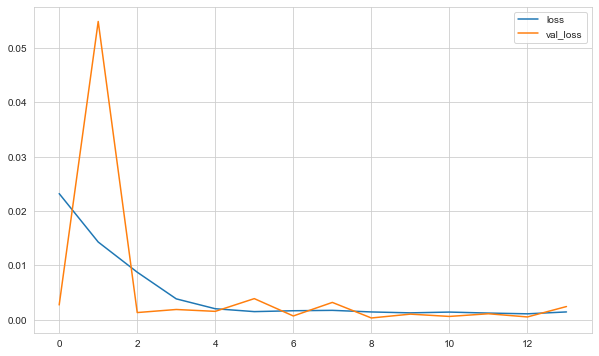

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [64]:
y_pred = model.predict(validation_generator)

In [65]:
y_pred

array([[0.624964  ],
       [0.5692088 ],
       [0.577982  ],
       [0.61495745],
       [0.5375102 ],
       [0.5687996 ]], dtype=float32)

In [66]:
test_scaled[-6:]

array([[0.59040081],
       [0.51499419],
       [0.53645077],
       [0.61185739],
       [0.46314987],
       [0.51463114]])

In [67]:
eval_metrics(test_scaled[-6:], y_pred)

r2_score: 0.03676796340085531 
 mae: 0.043656320037656154 
 mse: 0.0023886628679259357 
 rmse: 0.0488739487654306


In [68]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [69]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.8684194193545451 
 mae: 0.037537551465375935 
 mse: 0.0023193883793919596 
 rmse: 0.04816002885580489


### Inverse Transformations and Comparing

In [70]:
true_predictions = scaler.inverse_transform(test_predictions)

In [72]:
test['Predictions'] = true_predictions

In [73]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22510.829
2018-06-01,21589,21677.572
2018-07-01,21919,21843.448
2018-08-01,23381,23213.794
2018-09-01,20260,21324.831
2018-10-01,21473,21811.738
2018-11-01,25831,24848.286
2018-12-01,34706,32540.922
2019-01-01,16410,18041.309


<AxesSubplot:xlabel='DATE'>

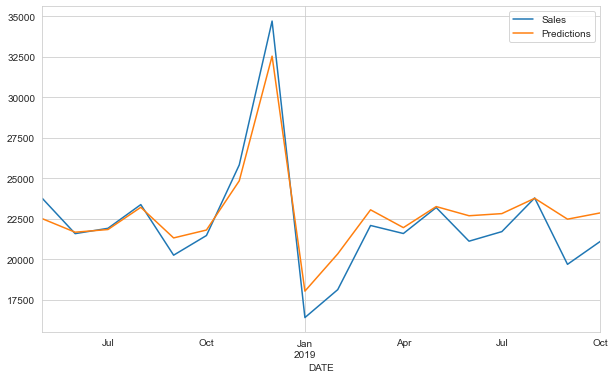

In [74]:
test.plot()

In [75]:
eval_metrics(test.Sales, test.Predictions)

r2_score: 0.8684194193545454 
 mae: 1033.934317562314 
 mse: 1759654.8721291975 
 rmse: 1326.5198348042886


## Retrain and Forecasting

In [78]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [79]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [80]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 10s 16ms/step - loss: 0.0255
Epoch 2/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0184
Epoch 3/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0107
Epoch 4/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0042
Epoch 5/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0036
Epoch 6/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0021
Epoch 7/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0018
Epoch 8/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0013
Epoch 9/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0013
Epoch 10/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0014
Epoch 11/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0014
Epoch 12/15
322/322 [==============================] - 4s 11ms/step - loss: 0.0013
Epoch 13/15


In [82]:
scaled_full_data.shape

(334, 1)

In [81]:
scaled_full_data[-length:].shape

(12, 1)

In [83]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [84]:
forecast = scaler.inverse_transform(forecast)

In [85]:
forecast

array([[25385.65077829],
       [35377.55182362],
       [16455.53616595],
       [18291.25930381],
       [21752.75444221],
       [21317.53135347],
       [22803.63719034],
       [20916.37950945],
       [21468.50014734],
       [23326.04378891],
       [19744.80841064],
       [20934.41085339]])

In [86]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [87]:
forecast_index = pd.date_range(start = '2019-11-01', periods = periods, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [88]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [89]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [90]:
forecast_df

,Forecast
2019-11-01,25385.651
2019-12-01,35377.552
2020-01-01,16455.536
2020-02-01,18291.259
2020-03-01,21752.754
2020-04-01,21317.531
2020-05-01,22803.637
2020-06-01,20916.380
2020-07-01,21468.500
2020-08-01,23326.044


<AxesSubplot:>

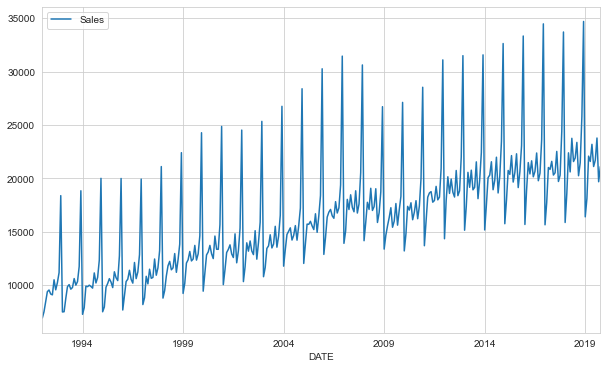

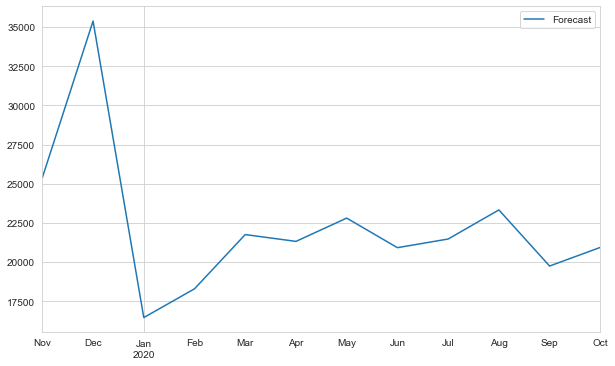

In [91]:
df.plot()
forecast_df.plot()

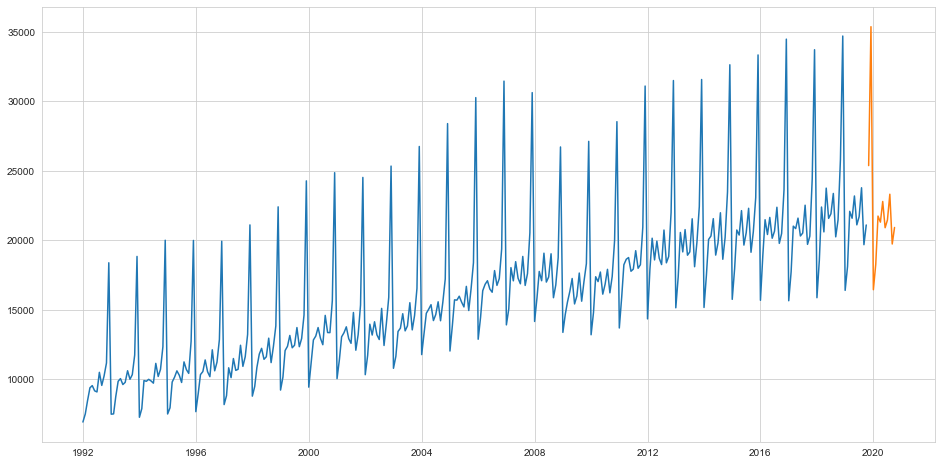

In [92]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
#plt.plot(forecast_index, forecast)

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

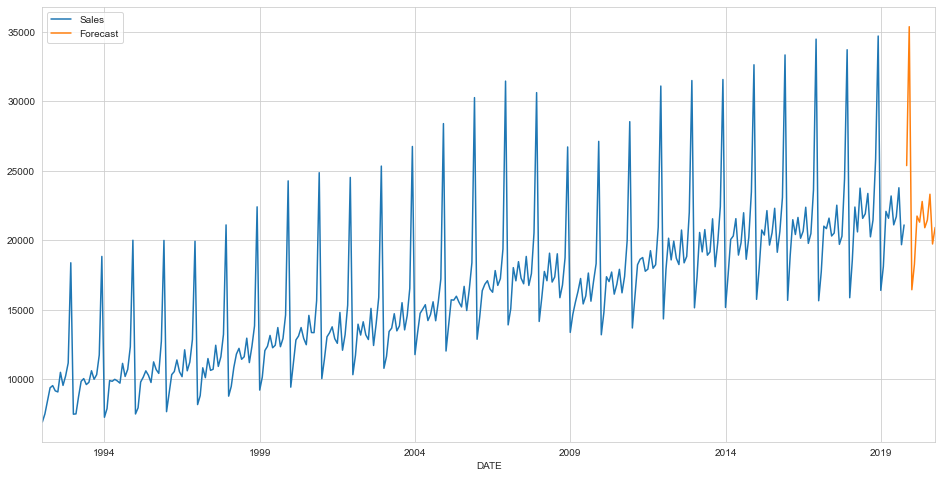

In [93]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

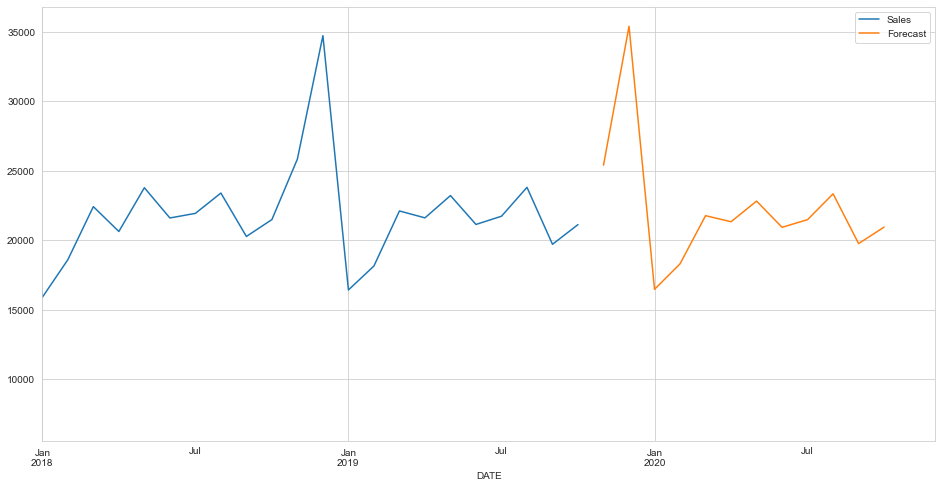

In [94]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')